# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print(data_2020['estacion'].unique())
print(data_2016['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
data_2019.estacion.replace({'Alberti':'Alberdi'},inplace=True)

In [8]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())
print(data_2020['sentido'].unique())
print(data_2016['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print(data_2020['tipo_vehiculo'].unique())
print(data_2016['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']


In [10]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print(data_2020['forma_pago'].unique())
print(data_2016['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [12]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [14]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


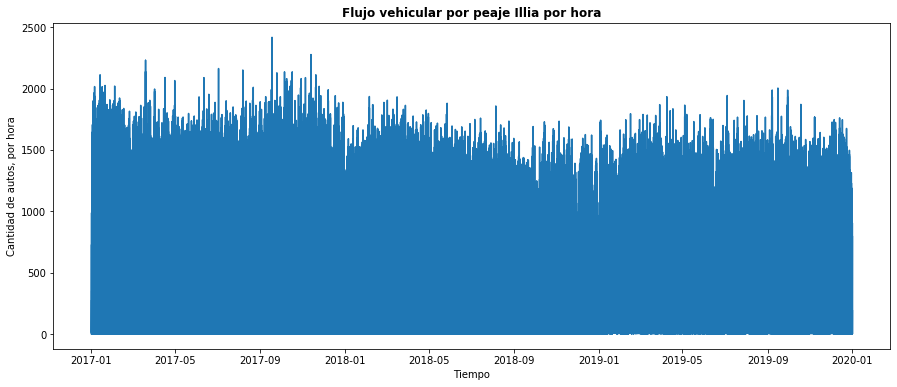

In [15]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.title ('Flujo vehicular por peaje Illia por hora',fontweight='black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

Fig. 1: Flujo de tránsito por peaje Illia determinado por hora. Se observa una saturación de la gráfica que no permite visualizar su tendencia o estacionalidad.



In [16]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [17]:
diario.cantidad_pasos.isnull().sum()

0

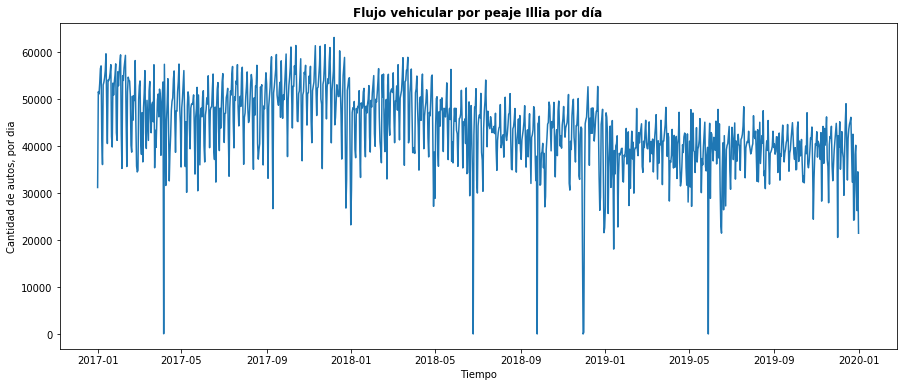

In [18]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title ('Flujo vehicular por peaje Illia por día',fontweight='black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Fig. 2: Flujo de tránsito por peaje Illia determinado por día que permite una mejor visualización de los datos. Podemos observar valores cercanos a 0 que pueden corresponder a valores faltantes.

### Imputación de valores faltantes ###

La ausencia de observaciones en series temporales dificulta la estimación de la función de autocorrelación, reduciendo el numero de terminos con los que se calcula el estimador de cada coeficiente de correlación.  Se decide interpolar la serie sustituyendo cada dato faltante por el algoritmo de la media de todas las observaciones registradas el mismo día y a la misma hora en cada año. 

In [19]:
diario.cantidad_pasos[diario.cantidad_pasos < 10000] = np.nan # pasamos a valores nulos para
# reemplazar los valores por la media

In [20]:
# Método rolling para imputación de valores faltantes
diario['cantidad_pasos'] = diario.cantidad_pasos.fillna(diario.cantidad_pasos.rolling(4,min_periods=1).mean())

In [21]:
diario.head()

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0


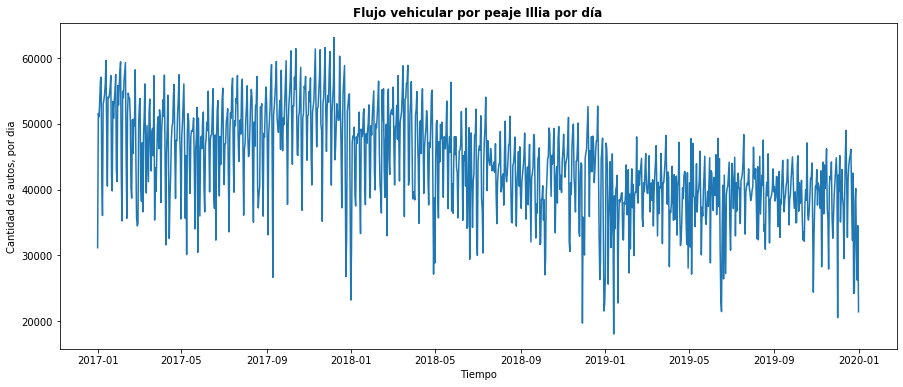

In [22]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title ('Flujo vehicular por peaje Illia por día',fontweight='black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Fig. 3: Serie final de datos procesada sin valores faltantes. 

In [23]:
diario.reset_index(inplace=True)

### Diferenciar la serie de tiempo ###

Esta es una técnica que nos permite observar que no existan valores faltantes.

In [24]:
# Podemos observar en esta línea de código que no tenemos valores faltantes
diario['date_check'] = diario.fecha.diff()
diario.date_check.value_counts()

1 days    1094
Name: date_check, dtype: int64

En el manejo de las  series de tiempo, son necesarias algunas características especiales en nuestros datos para poder hacer predicciones, y para ello se busca una serie cronológica que sea estacionaria. Se puede decir que una serie es estacionaria cuando su media y su varianza no están en función del tiempo, es decir, son constantes en el tiempo.
La estacionariedad es importante porque la mayoría de los métodos estadísticos se basan en la suposición de que las propiedades estadísticas de la serie (media, varianza, correlación, etc.) son constantes en el tiempo.
Para determinar si una series es estacionaria utilizamos la prueba de Dickey-Fuller.

Test Dickey Fuller

Ho: La serie es no estacionaria

H1: La serie es estacionaria

In [25]:
# Test de Dickey-Fuller  
from statsmodels.tsa.stattools import adfuller
X = diario.cantidad_pasos
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.708050
p-value: 0.426970
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Los números que debemos tener en cuenta son “ADF Statistic” y “Critical Value”. Siempre queremos que el primer valor sea menor que el segundo. Y cuanto menor es el valor de ADF Statistic, mejor. En este caso el valor de ADF es mayor que los valores críticos. Además el valor de p es > a 0.05 por lo tanto no se rechaza la hipotesis nula, y podemos decir que la serie no es estacionaria.

In [26]:
X = diario.cantidad_pasos
result = adfuller(np.log(X))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.840356
p-value: 0.360618
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Existen algunas técnicas que uno puede aplicar para estacionarizar una serie cronológica como vemos en el código de arriba. En este caso se aplica una transformación que penalice a los valores más altos y no tanto a los valores más pequeños mediate una transformación logarítmica.  Este método ayuda a reducir la tendencia.

In [27]:
# Crear una serie diferenciada
diff_= diario.diff()
diff_.head()

,fecha,cantidad_pasos,date_check
0,NaT,NaN,NaT
1,1 days,20385.0,-106751 days +00:12:43.145224
2,1 days,-475.0,0 days 00:00:00
3,1 days,2239.0,0 days 00:00:00
4,1 days,3154.0,0 days 00:00:00


In [28]:
diario.head()

,fecha,cantidad_pasos,date_check
0,2017-01-01,31183.0,NaT
1,2017-01-02,51568.0,1 days
2,2017-01-03,51093.0,1 days
3,2017-01-04,53332.0,1 days
4,2017-01-05,56486.0,1 days


In [29]:
X = diff_.cantidad_pasos.dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.378873
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Podemos observar como el valor de ADF Statistic es menor a los valores críticos y el valor de p es < a 0.05  por lo que nuestra serie ahora si es estacionaria. 

Obtenemos los componentes de una Serie de Tiempo es un tema amplio y, como siempre, depende del problema en el que estás trabajando.  El método más sencillo se conoce como media móvil. Consiste en tomar una ventana de tiempo suficientemente grande y promediar la serie sobre esa ventana. De esta forma, obtienes la tendencia. Una característica de este método es que no asume ninguna forma para la serie de tiempo - a diferencia del que te contaremos a continuación - así que suele funcionar en muchos casos.

El proceso de tomar una ventana, trasladarlo a lo largo de una serie de tiempo y hacer alguna operación en esa ventana se conoce como rolling window. En general, se utiliza junto con la media, pero también se podría obtener el máximo, mínimo o cualquier otro estadístico.

In [30]:
diario.columns

Index(['fecha', 'cantidad_pasos', 'date_check'], dtype='object')

In [31]:
diario.set_index(diario.fecha,inplace=True)

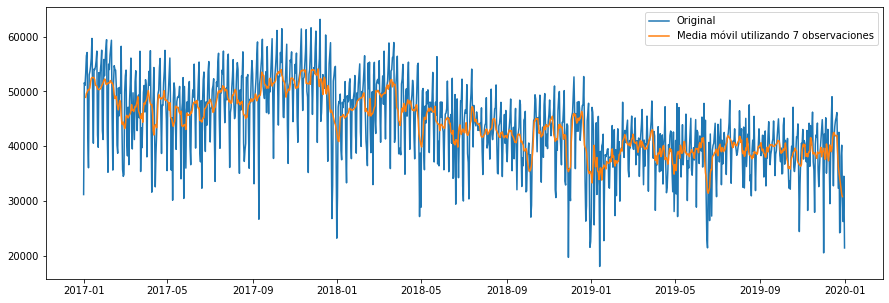

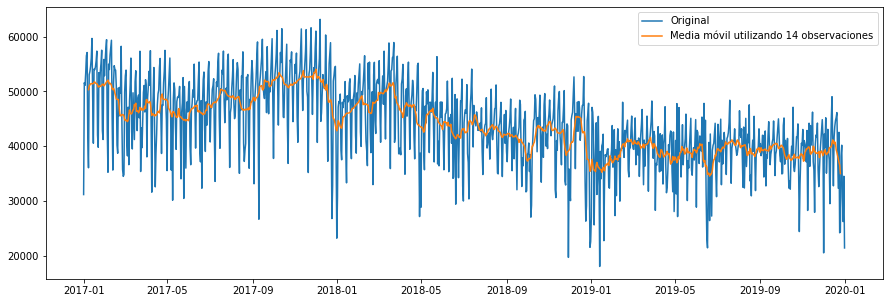

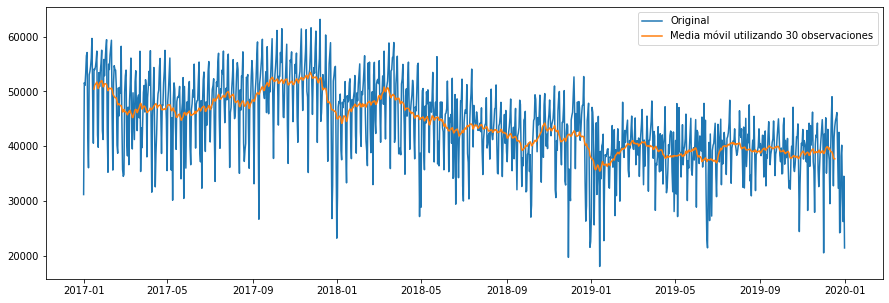

In [33]:
# Media movil
y_hat_avg = diario.copy()
y_hat_avg['moving_avg_forecast'] = diario['cantidad_pasos'].rolling(7,center = True).mean() 
# Promedio de las últimas 10 observaciones.
y_hat_avg=pd.DataFrame(y_hat_avg).set_index(diario.index.values)
plt.figure(figsize=(15,5)) 
plt.plot(diario['cantidad_pasos'], label='Original')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Media móvil utilizando 7 observaciones')
plt.legend(loc='best')
plt.show()

y_hat_avg = diario.copy()
y_hat_avg['moving_avg_forecast'] = diario['cantidad_pasos'].rolling(14,center = True).mean() 
# Promedio de las últimas 14 observaciones.
y_hat_avg=pd.DataFrame(y_hat_avg).set_index(diario.index.values)
plt.figure(figsize=(15,5))
plt.plot(diario['cantidad_pasos'], label='Original')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Media móvil utilizando 14 observaciones')
plt.legend(loc='best')
plt.show()

y_hat_avg = diario.copy()
y_hat_avg['moving_avg_forecast'] = diario['cantidad_pasos'].rolling(30,center = True).mean() 
# Promedio de las últimas 30 observaciones.
y_hat_avg=pd.DataFrame(y_hat_avg).set_index(diario.index.values)
plt.figure(figsize=(15,5))
plt.plot(diario['cantidad_pasos'], label='Original')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Media móvil utilizando 30 observaciones')
plt.legend(loc='best')
plt.show()

### Autocorrelación ###

Una parte fundamental en el estudio de las series de tiempo gira en torno a la relación que puede existir entre los valores de una serie de tiempo. La autocorrelación se define como la relación mutua existente entre valores de una serie de tiempo en diferentes períodos y describe lo que tiende a sucederle a un valor si se da un cambio en el otro.

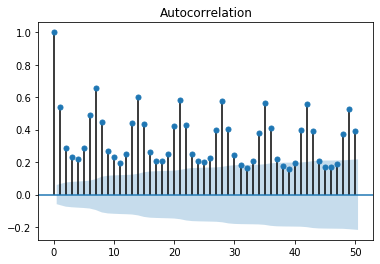

In [34]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diario.cantidad_pasos, lags = 50)
plt.show()

Fig. 4: Podemos observar una correlación de datos que corresponden a los distintos días de la semana.

### Autocorrelación parcial ###

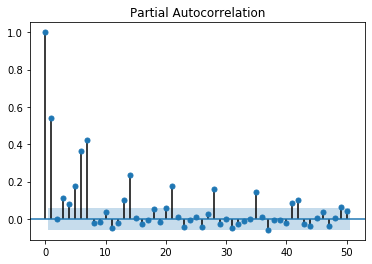

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(diario.cantidad_pasos, lags = 50)
plt.show()

### Descomponer la serie de tiempo ###

Esta es una técnica que trata de descomponer una serie de tiempo en su tendencia, su estacionalidad y sus factores residuales. Statsmodels viene con una función de descomposición que nos facilita en sobremanera el trabajo. 

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='aditive')

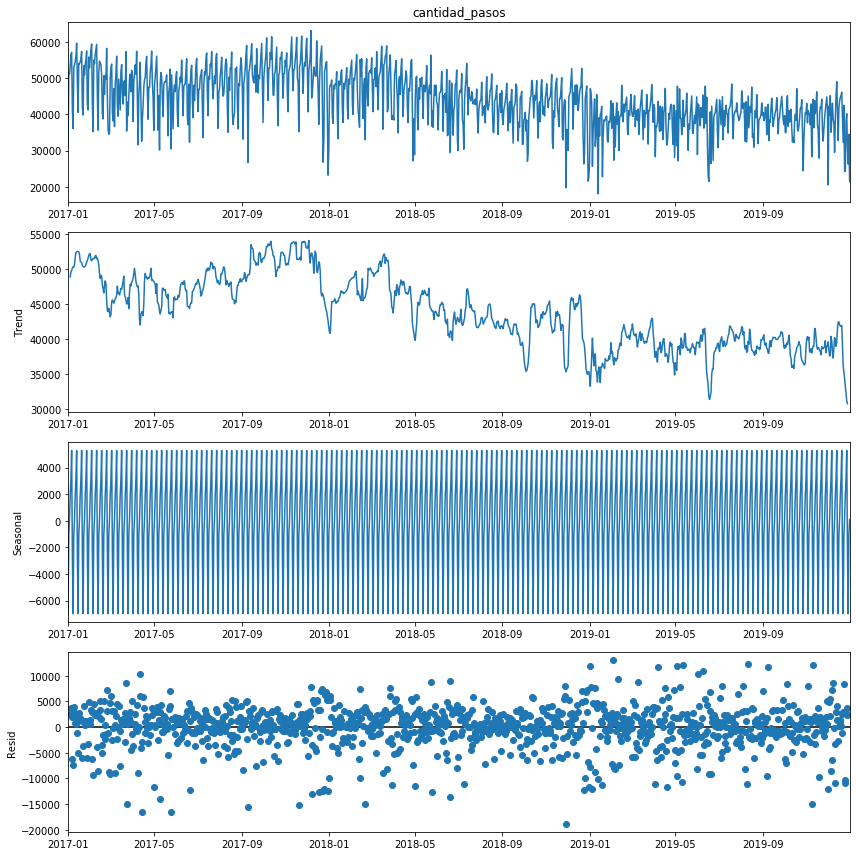

In [37]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

Pero por qué la disminución en la tendencia de cantidad de pasos con el metodo de pago efectivo en el peaje Illia ?

Vemos si se debe a un cambio en la forma de pago; de EFECTIVO a TELEPASE. Para ello analizamos la cantidad de paso por autopista Illia con TELEPASE. 

In [38]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago telepase
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'TELEPASE')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_t = dataset.resample('D', on = 'fecha').sum()
print(diario_t.shape)
diario_t.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,12326
2017-01-02,35621
2017-01-03,39390
2017-01-04,40294
2017-01-05,41373


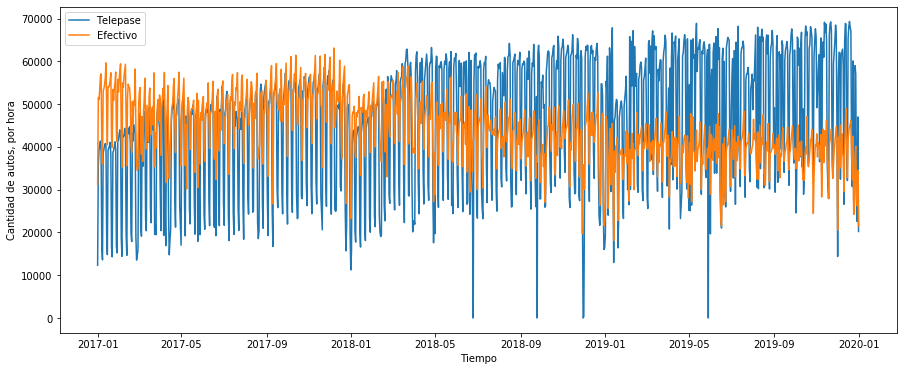

In [39]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(diario_t.index, diario_t.cantidad_pasos,label = 'Telepase')
plt.plot(diario.index, diario.cantidad_pasos, label = 'Efectivo')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.legend()
plt.show()

Fig. 5: El Telepase en las autopista de Buenos Aires se inauguró el 19 de Diciembre de 2016. Hoy más del 60 % de los automovilistas lo utilizan y ya es obligatorio para circular no sólo en Capital Federal sino también por ejemplo en la red de accesos a Córdoba. En este gráfico podemos observar el cambio en la tendencia del uso de efectivo a telepase. Seguramente en los próximos meses observaremos solo pago con este último sistema.

In [40]:
diario.shape

(1095, 3)

In [41]:
np.corrcoef(diario.cantidad_pasos, diario_t.cantidad_pasos)

array([[1.        , 0.42034277],
       [0.42034277, 1.        ]])

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### One-Step Prediction ###

In [42]:
diario.head()

,fecha,cantidad_pasos,date_check
fecha,,,
2017-01-01,2017-01-01,31183.0,NaT
2017-01-02,2017-01-02,51568.0,1 days
2017-01-03,2017-01-03,51093.0,1 days
2017-01-04,2017-01-04,53332.0,1 days
2017-01-05,2017-01-05,56486.0,1 days


In [43]:
diario.set_index(diario.fecha,inplace=True)

In [44]:
diario.drop(columns=['fecha','date_check'],inplace=True)

In [45]:
look_back = 90*1 # usamos x días de datos para predecir el valor siguiente

In [46]:
N = diario.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1004, 90) (1004,)


In [47]:
N-365-1

729

In [48]:
for i in range(X.shape[0]):
    X[i,:] = diario.values[i:i+look_back].ravel()
    y[i] = diario.values[i+look_back]

In [49]:
N_train = 2*365 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 1*365 # cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(640, 90) (640,)
(364, 90) (364,)


In [50]:
N_total

1005

## Modelo Benchmark ##

In [51]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [52]:
y_test_pred_benchmark.shape

(365,)

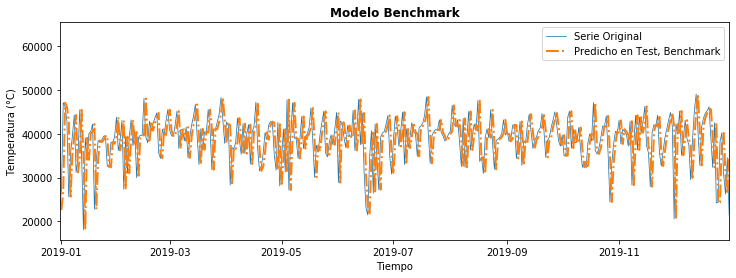

In [53]:
plt.figure(figsize=(12,4))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(diario.index[N_train+look_back-1], diario.index[length_total-1])
plt.title ('Modelo Benchmark', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_test_pred_benchmark [:- 1])
print('Error en Test:',np.sqrt(MSE))

Error en Test: 6637.327662316175


## Modelo Random Forest ##

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

In [56]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [57]:
diario.index[N_train+look_back: length_total].shape

(365,)

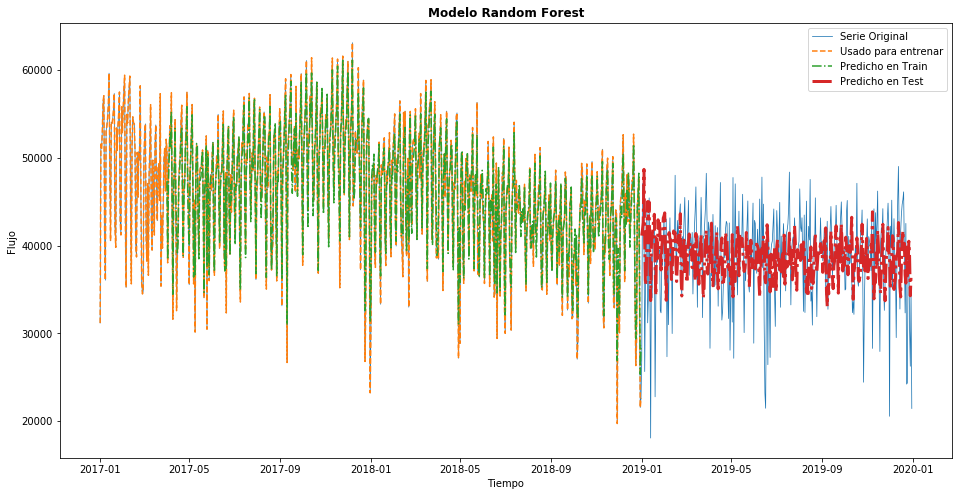

In [58]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.title ('Modelo Random Forest', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Fig. 6: Modelo predictivo de flujo vehicular utilizando el modelo Random Forest.

In [59]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1762.90216022728
Error en Test: 5161.010950398072


Raíz del error cuadrático medio en Train: 1762.90216022728
Raíz del error cuadrático medio en Test: 5161.010950398072


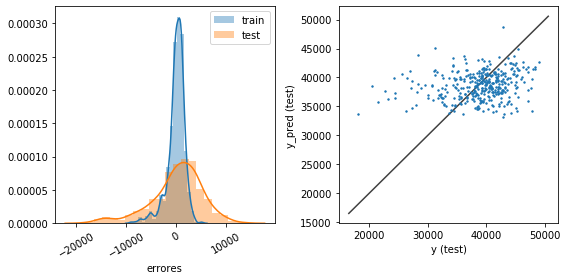

In [60]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.xticks (rotation=30)
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.xticks (rotation=0)
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

## ¿Qué información está usando el modelo para predecir? ##

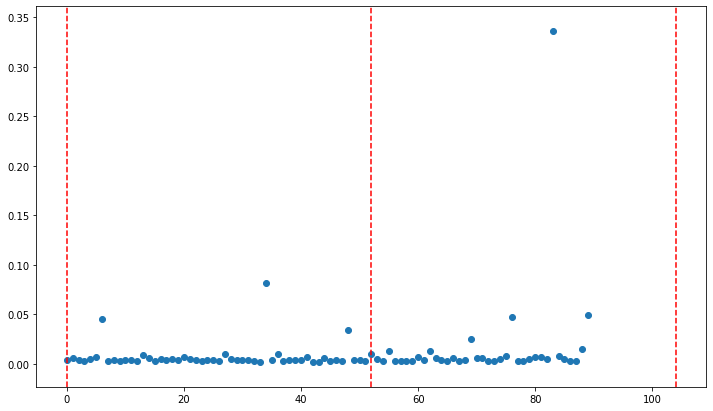

In [61]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*52:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

Fig. 7: El modelo utiliza los días los últimos días (algún día en particular despues del día 80 sobre todo) antes del día 1 de nuestro modelo como los mejores estimadores para predecir.

## Modelo Xgboost ##

In [62]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np

model = xgb.XGBRegressor()
param_search = {'max_depth' : [3, 5]}

# Optimización de hiperparámetros

tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv,scoring='neg_mean_squared_error',
                        param_grid=param_search)
gsearch.fit(X_train, y_train)

[23:18:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:18:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:18:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:18:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:18:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:18:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:18:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None, param_grid={'max_depth': [3, 5]},
             pre_dispatch='2*n_jobs', 

In [63]:
y_train_pred = gsearch.predict(X_train)
y_test_pred = gsearch.predict(X_test)

In [64]:
y_train_pred.shape

(640,)

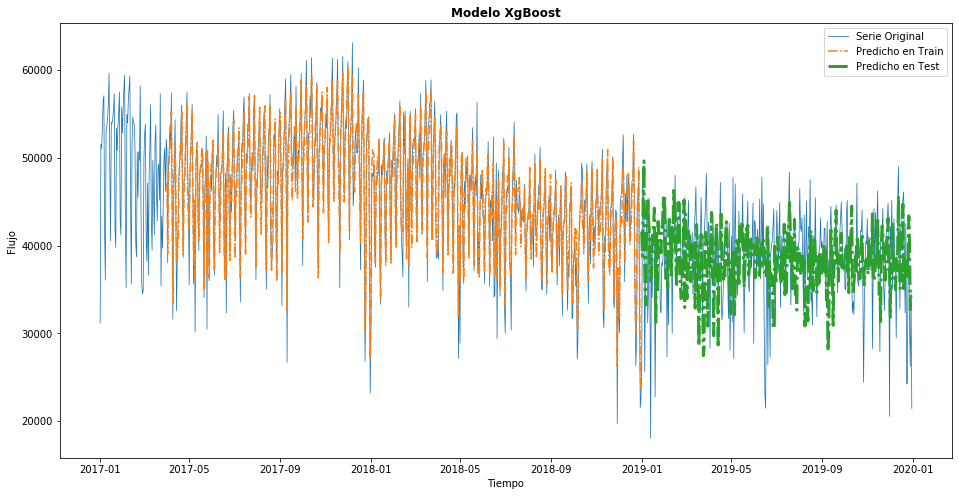

In [65]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.title ('Modelo XgBoost', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Fig. 7: Modelo predictivo de flujo vehicular utilizando el modelo Xgboost con optimización de hiperparámetros. 

In [66]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 2022.9646138086973
Error en Test: 5590.759264132905


Raíz del error cuadrático medio en Train: 2022.9646138086973
Raíz del error cuadrático medio en Test: 5590.759264132905


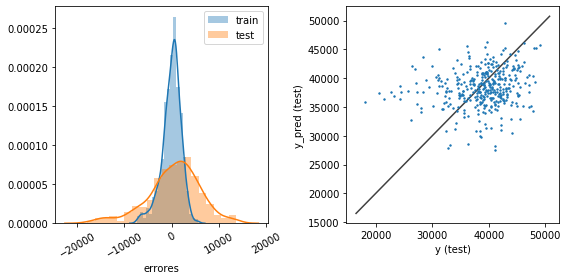

In [67]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = gsearch.predict(X_train)
y_test_pred = gsearch.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.xticks (rotation=30)
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.xticks (rotation=0)
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [68]:
tscv = TimeSeriesSplit(5)
for i, (train, test) in enumerate(tscv.split(X_train, y_train)):
    print("Class occurrences in train split #%d: %s" % 
           (i, y_train[train].shape))
    print("Class occurrences in test split #%d: %s" % 
           (i, y_train[test].shape))

Class occurrences in train split #0: (110,)
Class occurrences in test split #0: (106,)
Class occurrences in train split #1: (216,)
Class occurrences in test split #1: (106,)
Class occurrences in train split #2: (322,)
Class occurrences in test split #2: (106,)
Class occurrences in train split #3: (428,)
Class occurrences in test split #3: (106,)
Class occurrences in train split #4: (534,)
Class occurrences in test split #4: (106,)


## ¿Qué información está usando el modelo para predecir? ##

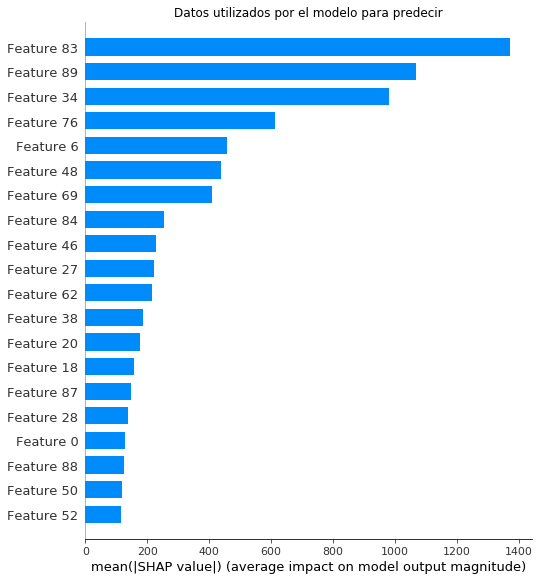

In [69]:
import shap
model = gsearch.best_estimator_
shap_values = shap.TreeExplainer(model).shap_values(X_train)
plt.title ('Datos utilizados por el modelo para predecir')
shap.summary_plot(shap_values, X_train, plot_type="bar")

El modelo utiliza los días 83, 89, 34 y 76 como los mejores estimadores para predecir.

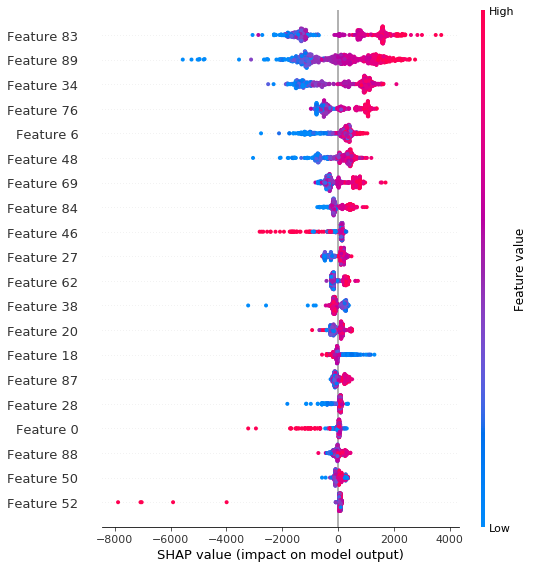

In [70]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)

In [71]:
tscv = TimeSeriesSplit(5)
for i, (train, test) in enumerate(tscv.split(X_train, y_train)):
    print("Class occurrences in train split #%d: %s" % 
           (i, y_train[train].shape))
    print("Class occurrences in test split #%d: %s" % 
           (i, y_train[test].shape))

Class occurrences in train split #0: (110,)
Class occurrences in test split #0: (106,)
Class occurrences in train split #1: (216,)
Class occurrences in test split #1: (106,)
Class occurrences in train split #2: (322,)
Class occurrences in test split #2: (106,)
Class occurrences in train split #3: (428,)
Class occurrences in test split #3: (106,)
Class occurrences in train split #4: (534,)
Class occurrences in test split #4: (106,)


## Resultados de los modelos ##

### Modelo Benchamark ###

Error en Test : 6637.32

### Modelo Random Forest ###
<span style="color:red">Error en Train : 1762.90</span>

<span style="color:red">Error en Test : 5161.01</span>

### Modelo Xgboost ###
Error en Train : 2022.96
    
Error en Test : 5590.75

**En nuestros resultados observamos que nuestro mejor modelo predictivo para los datos utilizados es el Random Forest** 

### Predicción año 2020 ###

Realizamos el EDA como lo realizamos para los años 2017, 2018 y 2019 en el comienzo del notebook

In [72]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847933 entries, 0 to 1847932
Data columns (total 13 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   mes             object
 3   dia             object
 4   dia_fecha       int64 
 5   hora_inicio     int64 
 6   hora_fin        int64 
 7   estacion        object
 8   tipo_vehiculo   object
 9   forma_pago      object
 10  observacion     object
 11  sentido         object
 12  cantidad_pasos  int64 
dtypes: int64(5), object(8)
memory usage: 183.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1


In [73]:
data_2020.forma_pago.replace({'Efectivo':'EFECTIVO','Tarjeta Magnética':'TELEPASE','Tag':'TELEPASE'},
                             inplace=True)

In [74]:
data_2020.estacion.replace({'ALBERDI':'Alberdi','AVELLANEDA':'Avellaneda','ILLIA':'Illia','RETIRO':'Retiro',
                            'SARMIENTO':'Sarmiento','SALGUERO':'Salguero','DELLEPIANE LINIERSLEPIANE CENTRO':
                           'Dellepiane Centro','DELLEPIANE LINIERS':'Dellepiane Liniers'},inplace=True)

In [75]:
data_2020.tipo_vehiculo.replace({'Pesado 2 Ejes':'Pesado','Pesado 3 Ejes':'Pesado','Pesado 4 Ejes':'Pesado',
                                 'Pesado 5 Ejes':'Pesado','Pesados 6 Ejes':'Pesado'})

0          Auto
1          Auto
2          Auto
3          Auto
4          Auto
           ... 
1847928     N/D
1847929     N/D
1847930     N/D
1847931     N/D
1847932     N/D
Name: tipo_vehiculo, Length: 1847933, dtype: object

In [76]:
data_2020.drop(columns=['mes','dia','observacion','dia_fecha'], inplace = True)

In [77]:
data_2020.head()

,periodo,fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,0,1,Alberdi,Auto,EFECTIVO,Centro,24
1,2020,2020-01-01 00:00:00,0,1,Alberdi,Auto,EFECTIVO,Provincia,80
2,2020,2020-01-01 00:00:00,0,1,Alberdi,Auto,Rec.Deuda,Provincia,1
3,2020,2020-01-01 00:00:00,0,1,Alberdi,Auto,Rec.Deuda,Centro,1
4,2020,2020-01-01 00:00:00,0,1,Alberdi,Auto,Rec.Deuda,Provincia,1


Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [78]:
#Unimos los 4 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2020,data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago telepase
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'TELEPASE')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_t = dataset.resample('D', on = 'fecha').sum()
print(diario_t.shape)
diario_t.head()

(1369, 1)


,cantidad_pasos
fecha,
2017-01-01,12326
2017-01-02,35621
2017-01-03,39390
2017-01-04,40294
2017-01-05,41373


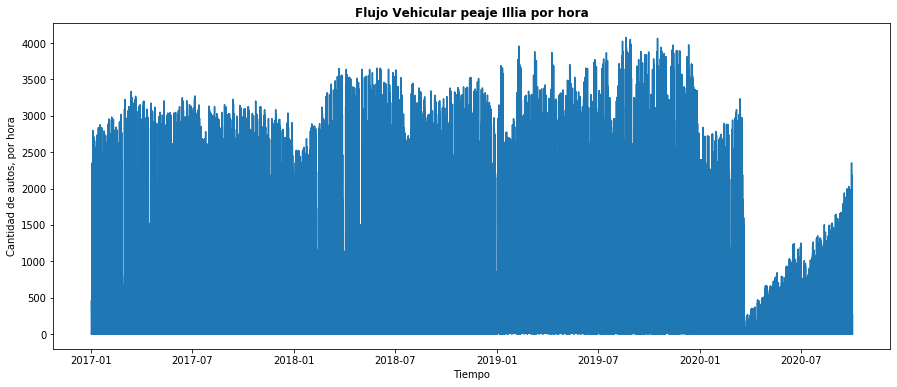

In [79]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.title ('Flujo Vehicular peaje Illia por hora', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

Fig.8 : En el gráfico podemos observar la baja en el flujo de la autopista producto de la pandemia COVID-19 donde se observa el quiebre en el mes de Marzo. 

In [80]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1369, 1)


,cantidad_pasos
fecha,
2017-01-01,12326
2017-01-02,35621
2017-01-03,39390
2017-01-04,40294
2017-01-05,41373


In [81]:
diario.cantidad_pasos.isnull().sum()

0

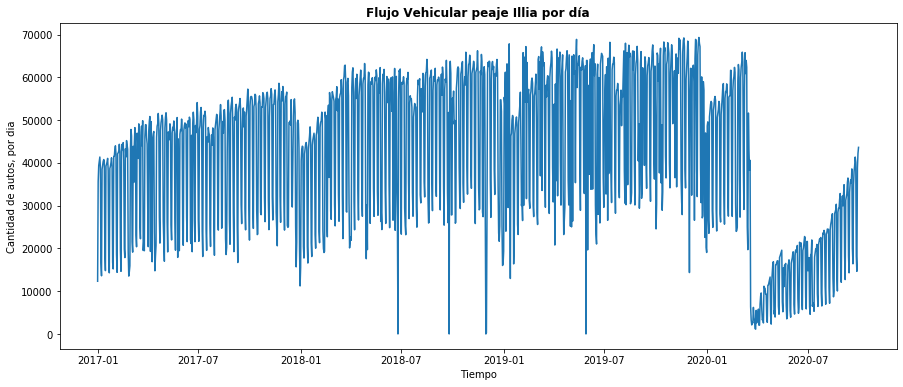

In [82]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title ('Flujo Vehicular peaje Illia por día', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Fig. 9 : Observamos lo mismo que en el gráfico anterior mejor detallado por día, y a medida que se van levantando las restricciones de circulación aumenta el flujo en la autopista

In [83]:
diario.tail()

,cantidad_pasos
fecha,
2020-09-26,18195
2020-09-27,14644
2020-09-28,38872
2020-09-29,42195
2020-09-30,43635


In [84]:
look_back = 90*1 # usamos x días de datos para predecir el valor siguiente

In [85]:
N = diario.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1278, 90) (1278,)


In [86]:
N-365-1

1003

In [87]:
for i in range(X.shape[0]):
    X[i,:] = diario.values[i:i+look_back].ravel()
    y[i] = diario.values[i+look_back]

In [88]:
N_train = 2*365 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 1*365 # cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(640, 90) (640,)
(365, 90) (365,)


In [89]:
N_total

1005

### Modelo Benchmark 2020 ###

In [90]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [91]:
y_test_pred_benchmark.shape

(365,)

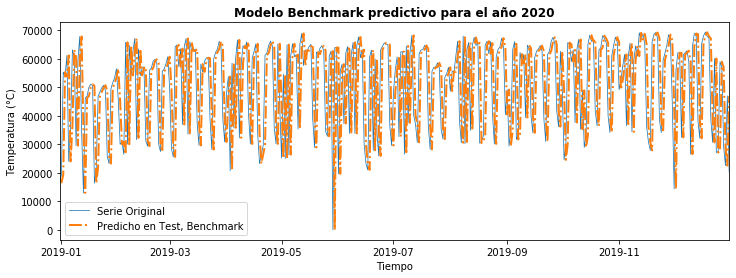

In [92]:
plt.figure(figsize=(12,4))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(diario.index[N_train+look_back-1], diario.index[length_total-1])
plt.title ('Modelo Benchmark predictivo para el año 2020', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_test_pred_benchmark)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 19652.020407337535


Observamos como al agregar los datos del año 2020 nuestro modelo benchmark empeoró notablemente su rendimiento con respecto al anterior.

### Modelo Benchmark (2017, 2018, 2019) ###
Error en Test: 6637.32

### Modelo Benchmark (2017, 2018, 2019 y 2020) ###
Error en Test: 19652.02

## Modelo Random Forest para predicción 2020 ##

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

In [95]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [96]:
diario.index[N_train+look_back: length_total].shape

(365,)

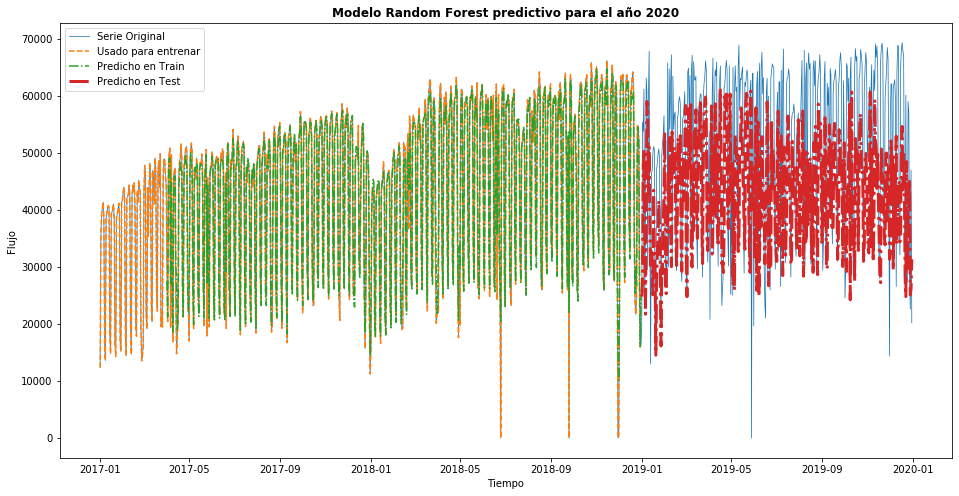

In [97]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 3, label = 'Predicho en Test')
plt.title ('Modelo Random Forest predictivo para el año 2020', fontweight = 'black')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

In [98]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 3045.287980699547
Error en Test: 17698.652607374057


### Modelo Random Forest (2017, 2018, 2019) ###

Error en Train: 1762.90

Error en Test: 5161.01

### Modelo Random Forest (2017, 2018, 2019 y 2020) ###

Error en Train: 3045.28

Error en Test: 17698.65

*Podemos observar que al agregar los datos del año 2020, nuestro modelos también empeora su resultado, observandose el aumento en el RMSE y también modificando el gráfico de tendencia de los datos. Probablemente el año 2020 funcione como un "año de valor atípico" o "año outlier" lo que altera notablemente el resultado de nuestro modelo.*

# Para pensar e investigar #

1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?

In [99]:
dataset_2 = dataset.copy()

In [100]:
dataset_2.head()

,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,dia,fecha
0,Illia,Pesado,TELEPASE,Centro,10,Domingo,2017-01-01
1,Illia,Pesado,TELEPASE,Provincia,7,Domingo,2017-01-01
2,Illia,Liviano,TELEPASE,Provincia,275,Domingo,2017-01-01
3,Illia,Liviano,TELEPASE,Centro,459,Domingo,2017-01-01
4,Illia,Pesado,TELEPASE,Centro,9,Domingo,2017-01-01


In [101]:
dataset_2 = dataset_2 [(dataset_2.estacion == 'Illia')|
                       (dataset_2.forma_pago == 'Efectivo')|
                       (dataset_2.tipo_vehiculo == 'Liviano')|
                       (dataset_2.sentido == 'Centro')]
#Reordenamos el dataset por fecha
dataset_2.sort_values('fecha', inplace = True)
dataset_2.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
dataset_2 = dataset_2.resample('D', on = 'fecha').sum()
print(dataset_2.shape)
dataset_2.head()

(1369, 1)


,cantidad_pasos
fecha,
2017-01-01,12326
2017-01-02,35621
2017-01-03,39390
2017-01-04,40294
2017-01-05,41373


In [102]:
look_back = 90*1 # usamos x días de datos para predecir el valor siguiente

In [103]:
N = dataset_2.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1278, 90) (1278,)


In [104]:
N-365-1

1003

In [105]:
for i in range(X.shape[0]):
    X[i,:] = dataset_2.values[i:i+look_back].ravel()
    y[i] = dataset_2.values[i+look_back]

In [106]:
N_train = 2*365 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 1*365 # cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(640, 90) (640,)
(365, 90) (365,)


In [107]:
N_total

1005

## Modelo Benchmark ##

In [108]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [109]:
y_test_pred_benchmark.shape

(365,)

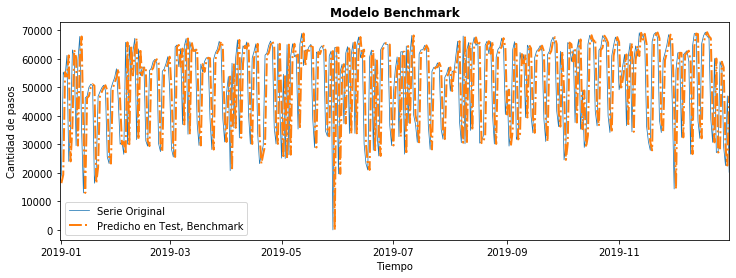

In [110]:
plt.figure(figsize=(12,4))
plt.plot(dataset_2.index[:length_total], dataset_2[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dataset_2.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(dataset_2.index[N_train+look_back-1], dataset_2.index[length_total-1])
plt.title ('Modelo Benchmark', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_test_pred_benchmark) #[:- 1])
print('Error en Test:',np.sqrt(MSE))

Error en Test: 19652.020407337535


2. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?

In [112]:
#Unimos los 4 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2020,data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago telepase
mask = np.logical_and(dataset.estacion=='Avellaneda', dataset.forma_pago == 'EFECTIVO')
dataset_av = dataset [mask]
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset_il = dataset [mask]
mask = np.logical_and(dataset.estacion=='Retiro', dataset.forma_pago == 'EFECTIVO')
dataset_re = dataset [mask]

#Quitamos las columnas que no vamos a utilizar
dataset_av.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
dataset_il.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
dataset_re.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_av['fecha2'] = pd.to_datetime(dataset_av.fecha) + pd.to_timedelta(dataset_av.hora_fin, unit = 'h')
dataset_il['fecha2'] = pd.to_datetime(dataset_il.fecha) + pd.to_timedelta(dataset_il.hora_fin, unit = 'h')
dataset_re['fecha2'] = pd.to_datetime(dataset_re.fecha) + pd.to_timedelta(dataset_re.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_av.drop(columns=['fecha','hora_fin'], inplace = True)
dataset_il.drop(columns=['fecha','hora_fin'], inplace = True)
dataset_re.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset_av.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_il.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_re.rename(columns = {'fecha2':'fecha'}, inplace = True)

#Reordenamos el dataset por fecha
dataset_av.sort_values('fecha', inplace = True)
dataset_av.reset_index(drop=True, inplace = True)
dataset_il.sort_values('fecha', inplace = True)
dataset_il.reset_index(drop=True, inplace = True)
dataset_re.sort_values('fecha', inplace = True)
dataset_re.reset_index(drop=True, inplace = True)

#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
dataset_av = dataset_av.resample('D', on = 'fecha').sum()
dataset_il = dataset_il.resample('D', on = 'fecha').sum()
dataset_re = dataset_re.resample('D', on = 'fecha').sum()

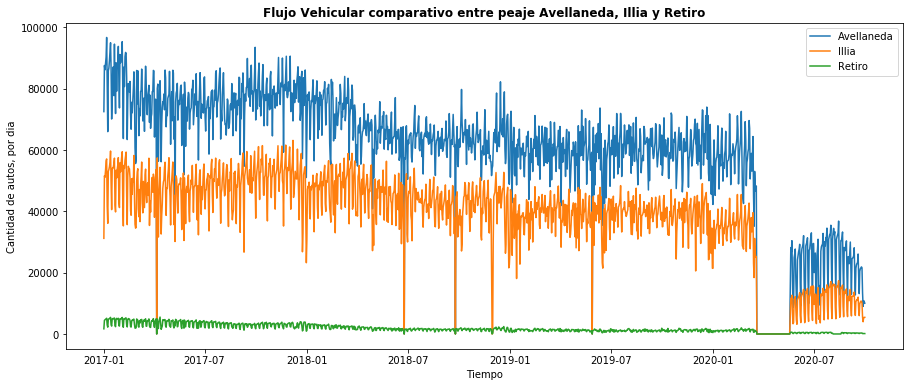

In [113]:
plt.figure(figsize = (15,6))
plt.plot(dataset_av.index, dataset_av.cantidad_pasos, label = 'Avellaneda')
plt.plot(dataset_il.index, dataset_il.cantidad_pasos, label = 'Illia')
plt.plot(dataset_re.index, dataset_re.cantidad_pasos, label = 'Retiro')
plt.title ('Flujo Vehicular comparativo entre peaje Avellaneda, Illia y Retiro', fontweight = 'black')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [114]:
dataset = pd.concat([data_2020,data_2019, data_2018, data_2017])
mask = np.logical_and(dataset.estacion=='Retiro', dataset.forma_pago == 'EFECTIVO')
dataset_re = dataset [mask]
dataset_re.tail()

,periodo,fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,dia
1372524,2017,2017-12-31,21,22,Retiro,Liviano,EFECTIVO,Provincia,28,Domingo
1372527,2017,2017-12-31,21,22,Retiro,Pesado,EFECTIVO,Provincia,3,Domingo
1372529,2017,2017-12-31,22,23,Retiro,Liviano,EFECTIVO,Provincia,1,Domingo
1372530,2017,2017-12-31,22,23,Retiro,Liviano,EFECTIVO,Provincia,6,Domingo
1372532,2017,2017-12-31,22,23,Retiro,Pesado,EFECTIVO,Provincia,1,Domingo


In [115]:
dataset_re['sentido'].unique()

array(['Provincia'], dtype=object)

Text(0.5, 1.0, 'Cantidad de pasos de acuerdo al tipo de vehiculo')

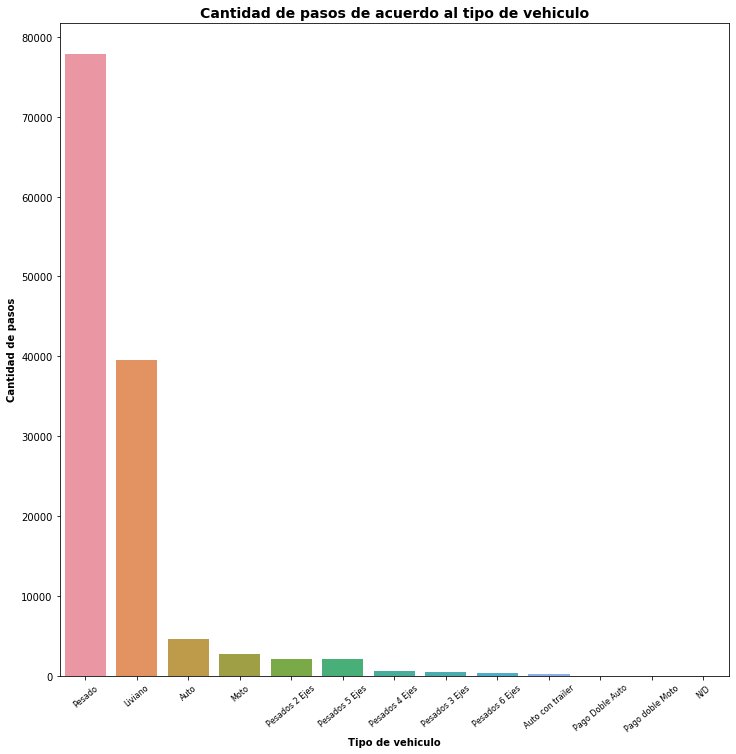

In [116]:
import seaborn as sns
sns.countplot(data=dataset_re,x=dataset_re['tipo_vehiculo'],order = dataset_re['tipo_vehiculo'].value_counts().index)
plt.xticks(rotation=40,fontsize=8) # rotation permite modificar la leyenda del eje X permitiendo una mejor visualización.
plt.xlabel("Tipo de vehiculo",fontweight='black')
plt.ylabel("Cantidad de pasos",fontweight='black')
plt.title ("Cantidad de pasos de acuerdo al tipo de vehiculo",fontweight='black',fontsize=14)

**Podemos observar que el comportamiento en todos los peajes no es similar. El peaje Illia esta ubicado en uno de las principales ingresos a la ciudad de Buenos Aires desde zona norte y autopista Rosario Córdoba, por lo que es uno de los de mayor tránsito. El segundo peaje analizado es el peaje Avellaneda, que mantiene la misma frecuencia que el anterior, pero con menor número de pasos. Por último, el peaje Retiro tiene muy poca cantidad de pasos con respecto a los dos anteriores. Esto probablemente debido a que tiene un solo sentido (Provincia) y como observamos en el gráfico superior es de paso principal de vehículos pesados.**

3. ¿Hay algo que te gustaría investigar o probar?



# Análisis fin de semana

**Cómo se comporta el flujo vehicular los fines de semana ?? Modifica algo el sábado o el domingo ?**

In [117]:
diario.reset_index(inplace=True)

In [118]:
# Exploramos el dataset sin modificar el original
# Cantidad de pasos durante el fin de semana
finde = diario.copy()
finde.head()

,fecha,cantidad_pasos
0,2017-01-01,12326
1,2017-01-02,35621
2,2017-01-03,39390
3,2017-01-04,40294
4,2017-01-05,41373


In [119]:
# Creamos nuevas variables
finde['year'] = finde.fecha.dt.year 
finde['month'] = finde.fecha.dt.month 
finde['day'] = finde.fecha.dt.day
finde['Hour'] = finde.fecha.dt.hour
finde

,fecha,cantidad_pasos,year,month,day,Hour
0,2017-01-01,12326,2017,1,1,0
1,2017-01-02,35621,2017,1,2,0
2,2017-01-03,39390,2017,1,3,0
3,2017-01-04,40294,2017,1,4,0
4,2017-01-05,41373,2017,1,5,0
...,...,...,...,...,...,...
1364,2020-09-26,18195,2020,9,26,0
1365,2020-09-27,14644,2020,9,27,0
1366,2020-09-28,38872,2020,9,28,0
1367,2020-09-29,42195,2020,9,29,0


In [120]:
# Variable para el fin de semana
finde['day of week']=finde['fecha'].dt.dayofweek
temp = finde['fecha']

In [121]:
# Definimos el día de la semana con la función. La semana comienza el Lunes que es 0
# Por lo tanto, sabado y domingo son días 5 y 6
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = finde['fecha'].apply(applyer)
finde['weekend'] = temp2

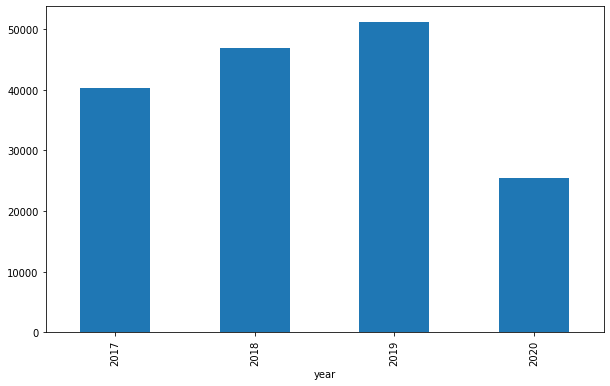

In [122]:
# Comparamos la cantidad de pasos los fines de semana por año
plt.figure(figsize = (10,6))
finde.groupby('year')['cantidad_pasos'].mean().plot.bar()

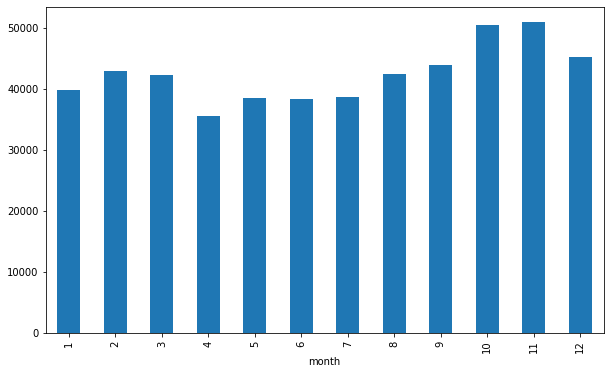

In [123]:
# Comparamos la cantidad de pasos los fines de semana por mes
plt.figure(figsize = (10,6))
finde.groupby('month')['cantidad_pasos'].mean().plot.bar()

El flujo vehicular se nota constante durante todos los fines de semana del año.

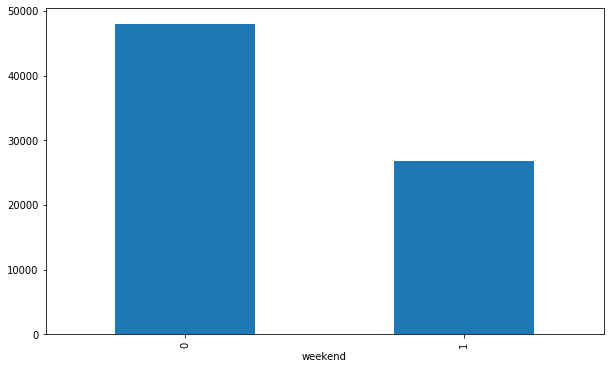

In [124]:
# Comparamos la cantidad de pasos los fines de semana por día
plt.figure(figsize = (10,6))
finde.groupby('weekend')['cantidad_pasos'].mean().plot.bar()

**El flujo vehicular aumenta durante los días sabados.**

## Vacaciones ##

**Si quiero viajar a Córdoba para las fiestas o para tomarme vacaciones en la 1er semana de Enero, cuál es el mejor día para salir en auto por el peaje Illia hacia Córdoba??**

In [199]:
findeanio = dataset.copy()

In [200]:
#Nos quedamos solamente con la estación Illia y la forma de pago telepase
mask = np.logical_and(findeanio.estacion=='Illia', findeanio.sentido == 'Provincia')
findeanio = findeanio [mask]

In [201]:
findeanio.head()

,periodo,fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,dia
53,2020,2020-01-01 00:00:00,0,1,Illia,Auto,EFECTIVO,Provincia,319,NaN
55,2020,2020-01-01 00:00:00,0,1,Illia,Auto,Exento,Provincia,1,NaN
57,2020,2020-01-01 00:00:00,0,1,Illia,Auto,Rec.Deuda,Provincia,1,NaN
59,2020,2020-01-01 00:00:00,0,1,Illia,Auto,Rec.Deuda,Provincia,5,NaN
61,2020,2020-01-01 00:00:00,0,1,Illia,Auto,TELEPASE,Provincia,2,NaN


In [202]:
findeanio['fecha'] = pd.to_datetime(findeanio.fecha) + pd.to_timedelta(findeanio.hora_fin, unit = 'h')
findeanio.drop(columns=['hora_inicio','hora_fin','dia','periodo'], inplace = True)
findeanio.sort_values('fecha', inplace = True)
findeanio.reset_index(drop=True, inplace = True)
findeanio = findeanio.resample('H', on = 'fecha').sum()
findeanio.shape

(32856, 1)

In [203]:
findeanio.head()

,cantidad_pasos
fecha,
2017-01-01 00:00:00,961
2017-01-01 01:00:00,242
2017-01-01 02:00:00,951
2017-01-01 03:00:00,1095
2017-01-01 04:00:00,706


In [204]:
findeanio_2017 = findeanio.loc["2017-12-22":"2018-01-05"]
findeanio_2018 = findeanio.loc["2018-12-22":"2019-01-05"]
findeanio_2019 = findeanio.loc["2019-12-22":"2020-01-05"]

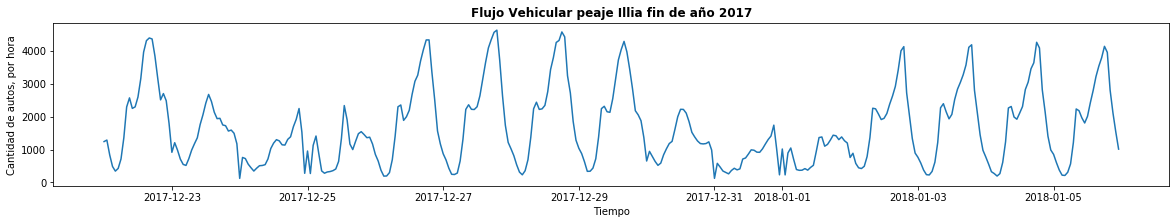

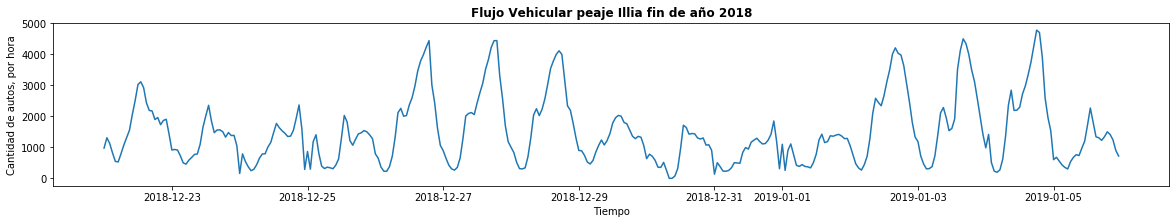

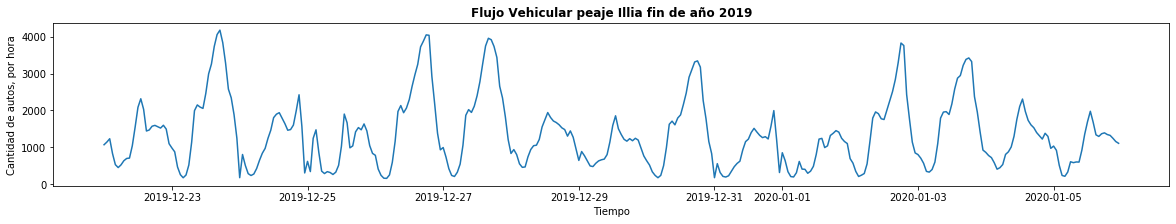

In [212]:
plt.figure(figsize = (20,3))
plt.plot(findeanio_2017.index, findeanio_2017.cantidad_pasos)
plt.title ('Flujo Vehicular peaje Illia fin de año 2017', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

plt.figure(figsize = (20,3))
plt.plot(findeanio_2018.index, findeanio_2018.cantidad_pasos)
plt.title ('Flujo Vehicular peaje Illia fin de año 2018', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

plt.figure(figsize = (20,3))
plt.plot(findeanio_2019.index, findeanio_2019.cantidad_pasos)
plt.title ('Flujo Vehicular peaje Illia fin de año 2019', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

Haciendo una evaluación de nuestra gráfica de los últimos 3 años, podremos observar que los días de menor circulación con sentido provincia de vehículos livianos es durante el 24 y 25 de Diciembre y el 31 y el 1 de Enero. Probablemente no querramos viajar en esas fechas, ya que vamos a llegar cansados a destino si salimos el 24 o el 31, o si nos acostamos tarde no es buena idea salir el 25 de Diciembre o el 1 de Enero. Creo que el mejor día para salir en un viaje a Córdoba por el peaje Illia es entre el 29 y el 30 de Diciembre. 